In [1]:
#loading data reading and manipulating 
import pandas as pd
import numpy as np  

In [ ]:
# #Reading all the sheets of data provided 

# feb = pd.read_excel("2GUD App Rating comments.xlsx", sheet_name = "Feb", usecols = "G:AA" ).assign(Month = 'feb')
# march = pd.read_excel("2GUD App Rating comments.xlsx", sheet_name = "March" ,usecols = "G:AA" ).assign(Month = 'march')
# #april = pd.read_excel("2GUD App Rating comments.xlsx", sheet_name = "" ,usecols="A,C,F")
# may = pd.read_excel("2GUD App Rating comments.xlsx", sheet_name = "May" ,usecols= "G:AA" ).assign(Month = 'may')
# june = pd.read_excel("2GUD App Rating comments.xlsx", sheet_name = "June",usecols= "G:AA" ).assign(Month = 'june')
# july = pd.read_excel("2GUD App Rating comments.xlsx", sheet_name = "July" ,usecols = "G:AA" ).assign(Month = 'july')
# august = pd.read_excel("2GUD App Rating comments.xlsx", sheet_name = "Aug_22",usecols = "G:AA" ).assign(Month = 'august')

In [ ]:
# feb.info()

In [ ]:
# final_df = feb.append([march, june, july, august], sort= False)

In [ ]:
# final_df.info()

In [ ]:
# final_df.to_csv("collated_app_comments_2gud.csv",index= False )

In [2]:
# Reading the collated file 

collated_data = pd.read_csv("collated_app_comments_2gud.csv")

## Method 1

#### NGRAM 

In [71]:
# filter for each month and poor star rating 
month_df = collated_data[(collated_data['Month'] == 'feb') & (collated_data['Star Rating'] <= 3.5)]

In [72]:
documents = month_df['Review Text'].tolist()

In [73]:
#converting it to a dataframe 
news_df = pd.DataFrame({'document':documents})
news_df.fillna('No comment', inplace = True)
#Removing all symbols etc from the comments 

# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

# make all text lowercase
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [74]:
display(news_df)

,document,clean_doc
0,So gud,so gud
1,Wrost,wrost
2,Is app down? Showing only white screen,is app down showing only white screen
3,Not a good app for 2nd mobile,not good app for nd mobile
4,Very good,very good
...,...,...
142,Don't buy anything from 2 gud...they show prod...,don buy anything from gud they show product on...
143,No comment,no comment
144,Why the refurbished phones are not delivered t...,why the refurbished phones are not delivered to
145,More than Time Blank Page,more than time blank page


In [75]:
#imporing libraries for implementing topic modelling 
import re
import nltk
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shivani.singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
#Correcting mis splet words
def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

In [77]:
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: reduce_lengthening(x))

In [78]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')

sparse_matrix = word_vectorizer.fit_transform(news_df['clean_doc'])

frequencies = sum(sparse_matrix).toarray()[0]

pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

,frequency
aadhe items,1
aakhir me,1
aaplication from,1
aati hai,1
ab email,1
...,...
your hard,1
your luck,1
your money,1
your order,1


In [79]:
temp = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
temp1 = temp.sort_values( by = "frequency", ascending = False)

In [80]:
temp1[temp1['frequency'] > 1]

,frequency
no comment,52
very bad,8
don buy,5
from gud,5
customer care,5
...,...
app and,2
remove it,2
for it,2
many problems,2


In [81]:
temp1.index.name = 'phrases'
temp1.reset_index(inplace=True)

## METHOD 2

#### WORD CLOUD

In [82]:
import collections
# import numpy as np
# import pandas as pd
import matplotlib.cm as cm
# import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [83]:
#storing the journey node sentence 
list_words = news_df["clean_doc"]

#Storing the final list of filtered words 
all_words = ' '.join(x.lower() for x in list_words )

In [88]:
stopwords = STOPWORDS
# 'flipkart'
l = ['comment','gud']

for i in l:
    stopwords.add(i)
    

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=60).generate(all_words)


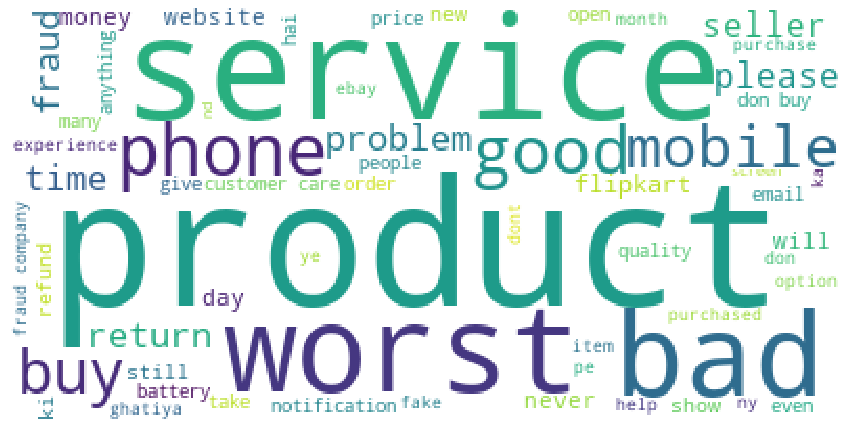

In [89]:
rcParams['figure.figsize'] = 15, 25
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## METHOD 3

#### top 10 most common words

In [90]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


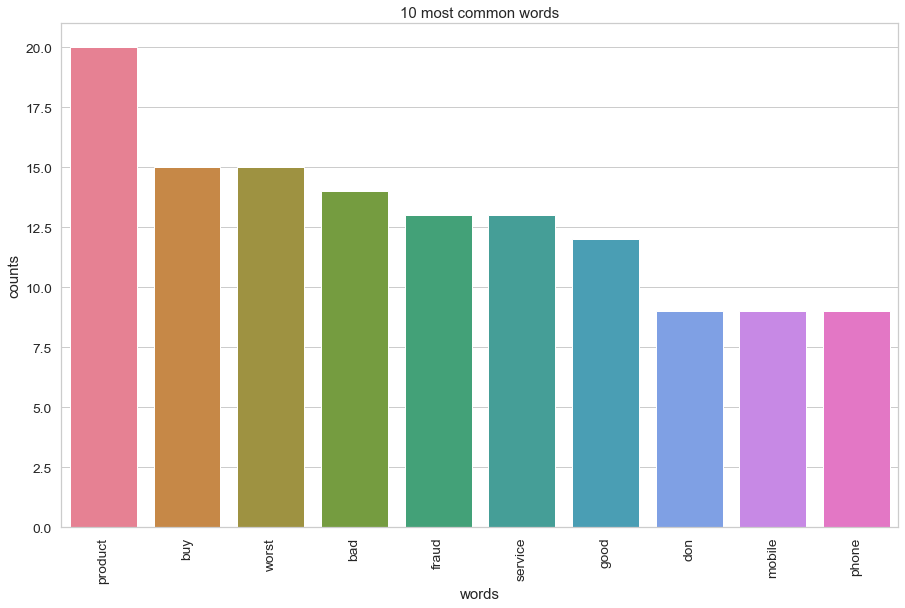

In [91]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=stopwords)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(news_df['clean_doc'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [92]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 2

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
never bad

Topic #1:
seller product

Topic #2:
buy bad

Topic #3:
worst support

Topic #4:
fraud return

Topic #5:
notification ka

Topic #6:
good bad

Topic #7:
open nice

Topic #8:
mobile service

Topic #9:
product phone
